# 腐蚀性数据

## Step1 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

df=pd.read_csv('Pitting potential data_xiongjie.csv')
df.head()

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Al                154 non-null    float64
 1   Co                154 non-null    float64
 2   Cr                154 non-null    float64
 3   Fe                154 non-null    float64
 4   Ni                154 non-null    float64
 5   Mo                154 non-null    float64
 6   Cu                154 non-null    float64
 7   Temperature       154 non-null    int64  
 8   Cl Concentration  154 non-null    float64
 9   PH                154 non-null    int64  
 10  Ep(mV)            154 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 13.4 KB


## 数据处理与清洗

In [2]:
for col in df.columns[:7]:
    df.rename(columns={col:col+"(wt%)"},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Al(wt%)           154 non-null    float64
 1   Co(wt%)           154 non-null    float64
 2   Cr(wt%)           154 non-null    float64
 3   Fe(wt%)           154 non-null    float64
 4   Ni(wt%)           154 non-null    float64
 5   Mo(wt%)           154 non-null    float64
 6   Cu(wt%)           154 non-null    float64
 7   Temperature       154 non-null    int64  
 8   Cl Concentration  154 non-null    float64
 9   PH                154 non-null    int64  
 10  Ep(mV)            154 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 13.4 KB


## 数据展示

### 性质分布

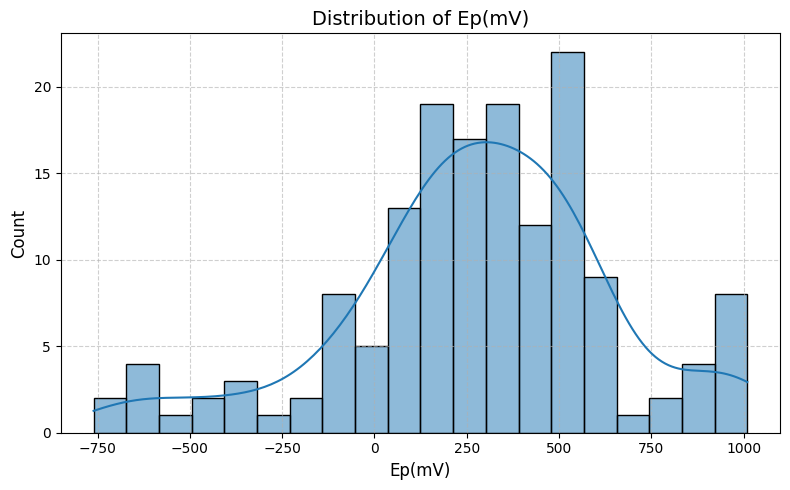

In [3]:
# 绘制 Ep(mV) 列的数据分布直方图
plt.figure(figsize=(8, 5))
sns.histplot(df['Ep(mV)'], bins=20, kde=True, color='C0')
plt.title('Distribution of Ep(mV)', fontsize=14)  # 英文标题
plt.xlabel('Ep(mV)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 元素分布

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Read the data file
# 读取数据文件
# data = pd.read_csv("../../datasets/With_Processing_Description/filtered_HEA_roomtemperature_datasets_no_duplicate_01_cleaned_Remove_Element_Sum_Error_with_processing_description.csv")
# data = pd.read_excel("./Al_mechanical_dataset.xlsx")

# Extract element names from column names
# 从列名中提取元素名称
data=df
elements = [col for col in data.columns if col.endswith(("(wt%)", "(at%)"))]

# Create a DataFrame to store element statistics
# 创建DataFrame存储元素统计信息
element_stats_list = []

# Calculate statistics for each element
# 计算每个元素的统计信息，跳过值为0的情况
for element in elements:
    # Filter out zeros
    # 过滤掉0值
    non_zero_data = data[element][data[element] > 0]
    
    if len(non_zero_data) > 0:  # Only include elements with non-zero values
        element_stats_list.append({
            'Element': element,
            'Count': len(non_zero_data),  # Count non-zero values
            'Range': f"{non_zero_data.min():.4f}-{non_zero_data.max():.4f}",  # Range of non-zero values
            'Average molar ratio': non_zero_data.mean(),  # Average of non-zero values
            'Total samples': len(data),  # Total number of samples
            'Percentage': f"{(len(non_zero_data)/len(data)*100):.2f}%"  # Percentage of non-zero values
        })

element_stats = pd.DataFrame(element_stats_list)

# Display the table
# 显示元素统计表格
print("\nElement Statistics Table:")
print("------------------------")
print(element_stats.to_string(index=False))

# Display summary statistics
# 显示汇总统计信息
print("\nSummary Statistics:")
print("-----------------")
print(f"Total number of samples: {len(data)}")
print(f"Total number of elements: {len(elements)}")
print(f"Average elements per sample: {element_stats['Count'].mean():.2f}")
print(f"Most common element: {element_stats.loc[element_stats['Count'].idxmax(), 'Element']} ({element_stats['Count'].max()} samples)")
print(f"Least common element: {element_stats.loc[element_stats['Count'].idxmin(), 'Element']} ({element_stats['Count'].min()} samples)")



Element Statistics Table:
------------------------
Element  Count         Range  Average molar ratio  Total samples Percentage
Al(wt%)     80 0.0250-0.9992             0.430475            154     51.95%
Co(wt%)     42 0.0704-0.3462             0.224459            154     27.27%
Cr(wt%)    129 0.0250-0.4450             0.203196            154     83.77%
Fe(wt%)     69 0.1429-0.7140             0.281374            154     44.81%
Ni(wt%)    122 0.0247-0.8171             0.462050            154     79.22%
Mo(wt%)     68 0.0145-0.4200             0.095351            154     44.16%
Cu(wt%)     25 0.0008-0.2000             0.066144            154     16.23%

Summary Statistics:
-----------------
Total number of samples: 154
Total number of elements: 7
Average elements per sample: 76.43
Most common element: Cr(wt%) (129 samples)
Least common element: Cu(wt%) (25 samples)


## 保存数据

In [5]:
df.to_csv('Pitting potential data_xiongjie_processed.csv',index=False)

# 力学高熵合金数据

## 读取数据

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

df=pd.read_csv('Strength and ductility data_xiongjie.csv')
df.head()

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Al             88 non-null     float64
 1   Co             88 non-null     float64
 2   Cr             88 non-null     float64
 3   Fe             88 non-null     float64
 4   Ni             88 non-null     float64
 5   UTS(MPa)       88 non-null     float64
 6   elongation(%)  88 non-null     float64
dtypes: float64(7)
memory usage: 4.9 KB


## 数据处理与清洗

In [7]:
for col in df.columns[:5]:
    df.rename(columns={col:col+"(wt%)"},inplace=True)
df.rename(columns={"elongation(%)":"El(%)"},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Al(wt%)   88 non-null     float64
 1   Co(wt%)   88 non-null     float64
 2   Cr(wt%)   88 non-null     float64
 3   Fe(wt%)   88 non-null     float64
 4   Ni(wt%)   88 non-null     float64
 5   UTS(MPa)  88 non-null     float64
 6   El(%)     88 non-null     float64
dtypes: float64(7)
memory usage: 4.9 KB


### 性质分布

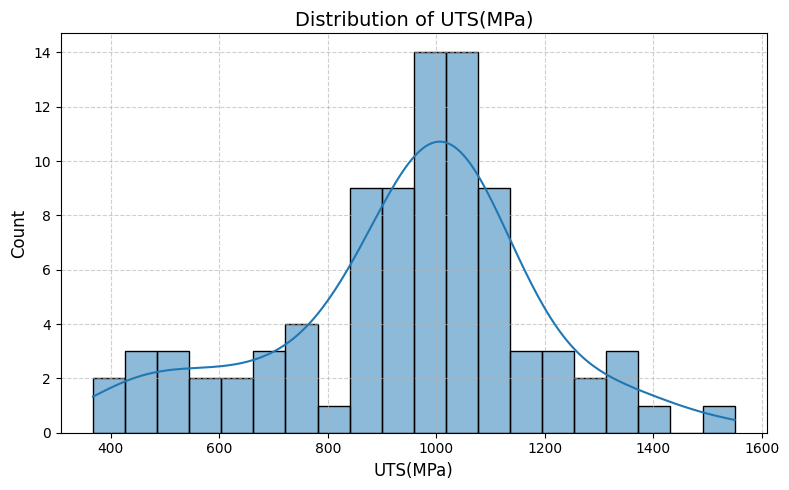

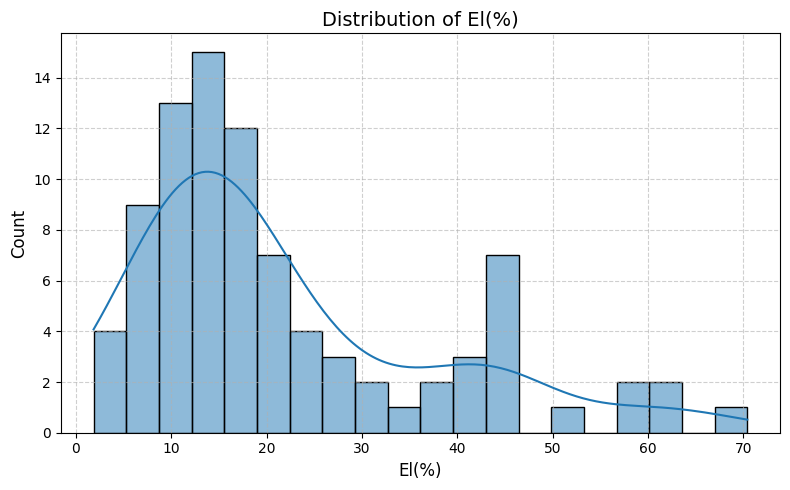

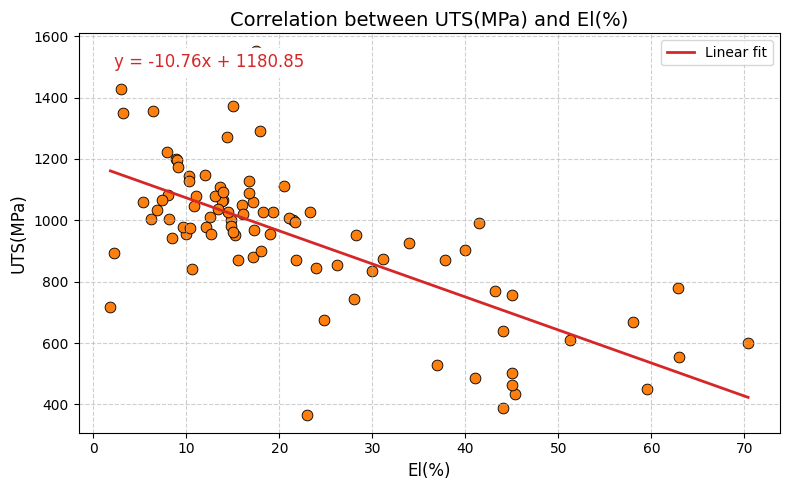

In [8]:
column_name = ["UTS(MPa)", "El(%)"]

# 绘制 UTS(MPa) 和 El(%) 的分布直方图
for col in column_name:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True, color='C0')
    plt.title('Distribution of ' + col, fontsize=14)  # 英文标题
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# 增加两个性质的相关性图，并拟合，绘制拟合曲线和方程
# 相关性分析：UTS(MPa) vs El(%)
import numpy as np

x = df["El(%)"]
y = df["UTS(MPa)"]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y, color='C1', s=60, edgecolor='k')
plt.title('Correlation between UTS(MPa) and El(%)', fontsize=14)
plt.xlabel('El(%)', fontsize=12)
plt.ylabel('UTS(MPa)', fontsize=12)

# 线性拟合
coeffs = np.polyfit(x, y, 1)  # 一次多项式拟合
fit_fn = np.poly1d(coeffs)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = fit_fn(x_fit)
plt.plot(x_fit, y_fit, color='C3', lw=2, label='Linear fit')

# 拟合方程字符串
equation = f"y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}"
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             backgroundcolor='white', color='C3', ha='left', va='top')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 元素分布

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Read the data file
# 读取数据文件
# data = pd.read_csv("../../datasets/With_Processing_Description/filtered_HEA_roomtemperature_datasets_no_duplicate_01_cleaned_Remove_Element_Sum_Error_with_processing_description.csv")
# data = pd.read_excel("./Al_mechanical_dataset.xlsx")

# Extract element names from column names
# 从列名中提取元素名称
data=df
elements = [col for col in data.columns if col.endswith(("(wt%)", "(at%)"))]

# Create a DataFrame to store element statistics
# 创建DataFrame存储元素统计信息
element_stats_list = []

# Calculate statistics for each element
# 计算每个元素的统计信息，跳过值为0的情况
for element in elements:
    # Filter out zeros
    # 过滤掉0值
    non_zero_data = data[element][data[element] > 0]
    
    if len(non_zero_data) > 0:  # Only include elements with non-zero values
        element_stats_list.append({
            'Element': element,
            'Count': len(non_zero_data),  # Count non-zero values
            'Range': f"{non_zero_data.min():.4f}-{non_zero_data.max():.4f}",  # Range of non-zero values
            'Average molar ratio': non_zero_data.mean(),  # Average of non-zero values
            'Total samples': len(data),  # Total number of samples
            'Percentage': f"{(len(non_zero_data)/len(data)*100):.2f}%"  # Percentage of non-zero values
        })

element_stats = pd.DataFrame(element_stats_list)

# Display the table
# 显示元素统计表格
print("\nElement Statistics Table:")
print("------------------------")
print(element_stats.to_string(index=False))

# Display summary statistics
# 显示汇总统计信息
print("\nSummary Statistics:")
print("-----------------")
print(f"Total number of samples: {len(data)}")
print(f"Total number of elements: {len(elements)}")
print(f"Average elements per sample: {element_stats['Count'].mean():.2f}")
print(f"Most common element: {element_stats.loc[element_stats['Count'].idxmax(), 'Element']} ({element_stats['Count'].max()} samples)")
print(f"Least common element: {element_stats.loc[element_stats['Count'].idxmin(), 'Element']} ({element_stats['Count'].min()} samples)")



Element Statistics Table:
------------------------
Element  Count         Range  Average molar ratio  Total samples Percentage
Al(wt%)     87 0.0243-0.2545             0.149269             88     98.86%
Co(wt%)     73 0.0100-0.3030             0.189049             88     82.95%
Cr(wt%)     82 0.0500-0.3773             0.178793             88     93.18%
Fe(wt%)     72 0.0500-0.4854             0.198192             88     81.82%
Ni(wt%)     88 0.0970-0.8000             0.366735             88    100.00%

Summary Statistics:
-----------------
Total number of samples: 88
Total number of elements: 5
Average elements per sample: 80.40
Most common element: Ni(wt%) (88 samples)
Least common element: Fe(wt%) (72 samples)


## 保存数据

In [10]:
df.to_csv('Strength and ductility data_xiongjie_processed.csv',index=False)